# Notebook overview

The goal of this notebook is to perform an Exploratory Analysis on the provided datasets in order to have a better understanding of the data.

The analysis will be carried out on each dataset and multiple datasets joined together.

The datasets are exported as csv files and have the following relations:

<img src="./assets/db-schema.jpg" width="800" />

# Imports

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc, warnings
from tqdm import notebook as tqdm

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('whitegrid', {'grid.linewidth': .05, 'grid.color': '.85'})
sns.set_palette('Set2')

# Application

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [178]:
df_application = pd.read_csv('./data/source/application_train.csv')
df_application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,100008,0,Cash loans,M,N,Y,0,99000.0000,490495.5000,27517.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
6,100009,0,Cash loans,F,Y,Y,1,171000.0000,1560726.0000,41301.0000,...,0,0,0,0,0.0000,0.0000,0.0000,1.0000,1.0000,2.0000
7,100010,0,Cash loans,M,Y,Y,0,360000.0000,1530000.0000,42075.0000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,100011,0,Cash loans,F,N,Y,0,112500.0000,1019610.0000,33826.5000,...,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
9,100012,0,Revolving loans,M,N,Y,0,135000.0000,405000.0000,20250.0000,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Overview

In [179]:
df_application.shape

(307511, 122)

In [180]:
df_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

The dataset has 122 features, one of them is our target feature (`TARGET`) which can be 1 or 0.

In [181]:
df_application.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [182]:
df_application['SK_ID_CURR'].nunique()

307511

In [292]:
flag_cols = [col for col in df_application.columns if col.startswith('FLAG')]
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
for bin_feature in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_application[bin_feature], uniques = pd.factorize(df_application[bin_feature])

In [297]:
categorical_columns = df_application.select_dtypes(['object']).columns
categorical_columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [300]:
for cat_column in categorical_columns:
    print(f'{cat_column}: {df_application[cat_column].nunique()} unique values')
    print(df_application[cat_column].value_counts())
    print('---')

TARGET: 2 unique values
TARGET
0    282680
1     24825
Name: count, dtype: int64
---
NAME_CONTRACT_TYPE: 2 unique values
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29273
Name: count, dtype: int64
---
CODE_GENDER: 2 unique values
CODE_GENDER
F    202447
M    105058
Name: count, dtype: int64
---
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_CAR
N    202920
Y    104585
Name: count, dtype: int64
---
FLAG_OWN_REALTY: 2 unique values
FLAG_OWN_REALTY
Y    213306
N     94199
Name: count, dtype: int64
---
NAME_TYPE_SUITE: 7 unique values
NAME_TYPE_SUITE
Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
---
NAME_INCOME_TYPE: 8 unique values
NAME_INCOME_TYPE
Working                 158771
Commercial associate     71614
Pensioner                55362
State servant            21703
Unemployed                  22
Student         

### Missing values

In [183]:
df_application_nan = df_application.isnull().mean().sort_values(ascending=False)
df_application_nan.iloc[:60]

COMMONAREA_MEDI                0.6987
COMMONAREA_AVG                 0.6987
COMMONAREA_MODE                0.6987
NONLIVINGAPARTMENTS_MODE       0.6943
NONLIVINGAPARTMENTS_AVG        0.6943
NONLIVINGAPARTMENTS_MEDI       0.6943
FONDKAPREMONT_MODE             0.6839
LIVINGAPARTMENTS_MODE          0.6835
LIVINGAPARTMENTS_AVG           0.6835
LIVINGAPARTMENTS_MEDI          0.6835
FLOORSMIN_AVG                  0.6785
FLOORSMIN_MODE                 0.6785
FLOORSMIN_MEDI                 0.6785
YEARS_BUILD_MEDI               0.6650
YEARS_BUILD_MODE               0.6650
YEARS_BUILD_AVG                0.6650
OWN_CAR_AGE                    0.6599
LANDAREA_MEDI                  0.5938
LANDAREA_MODE                  0.5938
LANDAREA_AVG                   0.5938
BASEMENTAREA_MEDI              0.5852
BASEMENTAREA_AVG               0.5852
BASEMENTAREA_MODE              0.5852
EXT_SOURCE_1                   0.5638
NONLIVINGAREA_MODE             0.5518
NONLIVINGAREA_AVG              0.5518
NONLIVINGARE

We see that the columns having the most amount of missing values are those who describe the building where the client lives (Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor).

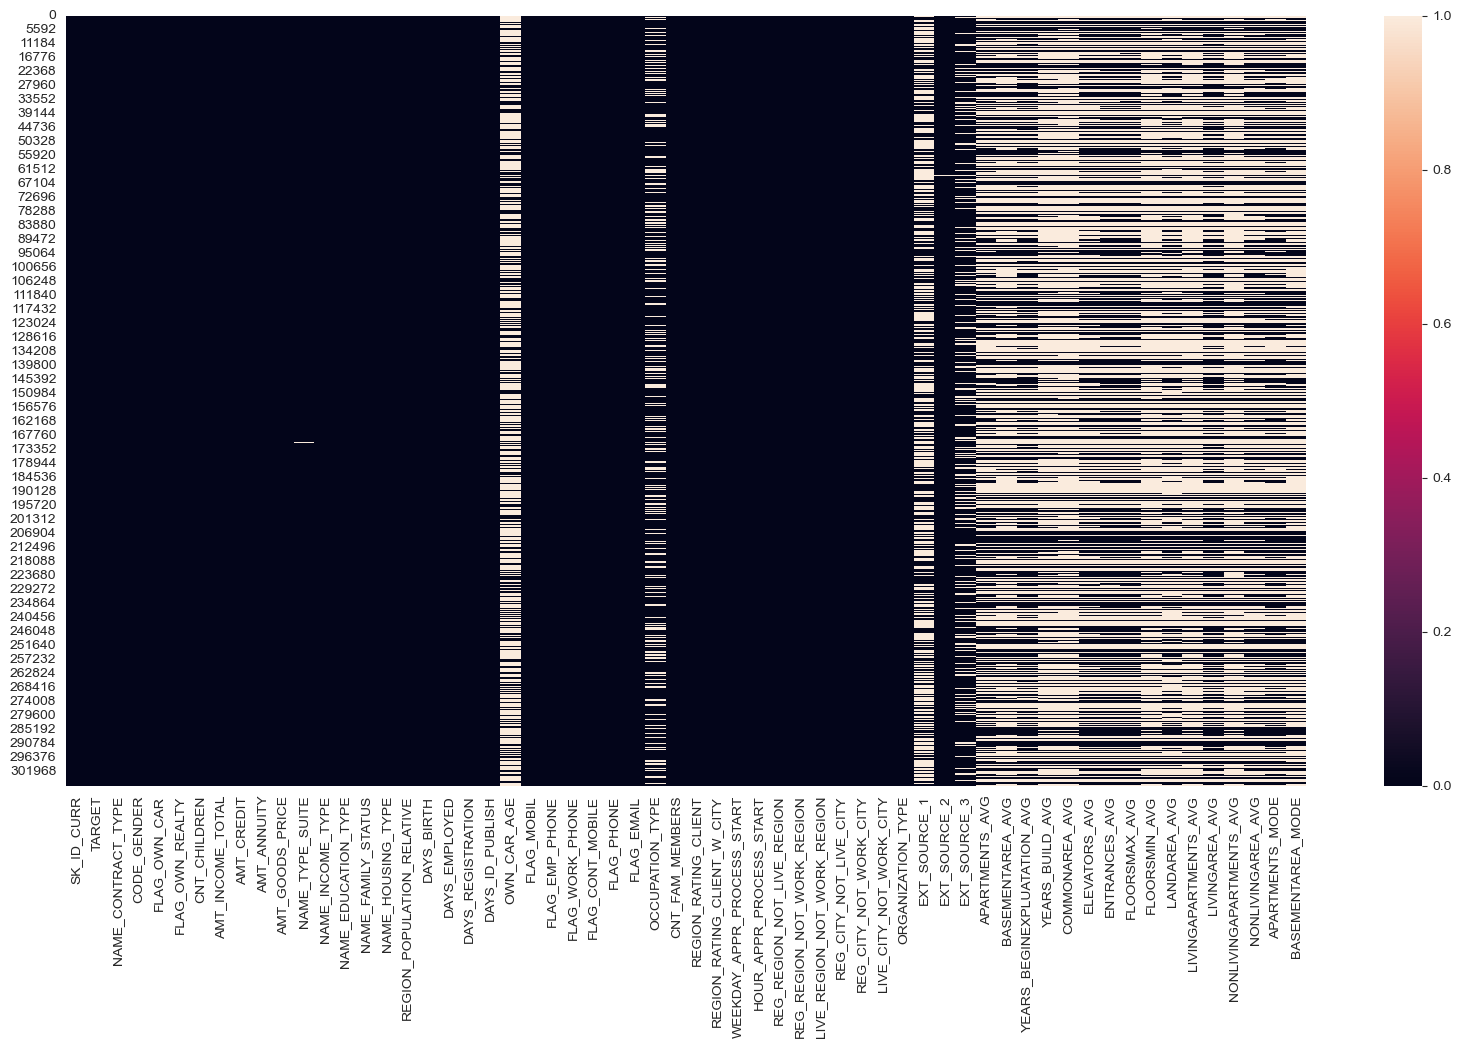

In [184]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_application.loc[:, 'SK_ID_CURR':'BASEMENTAREA_MODE'].isnull())
plt.show()

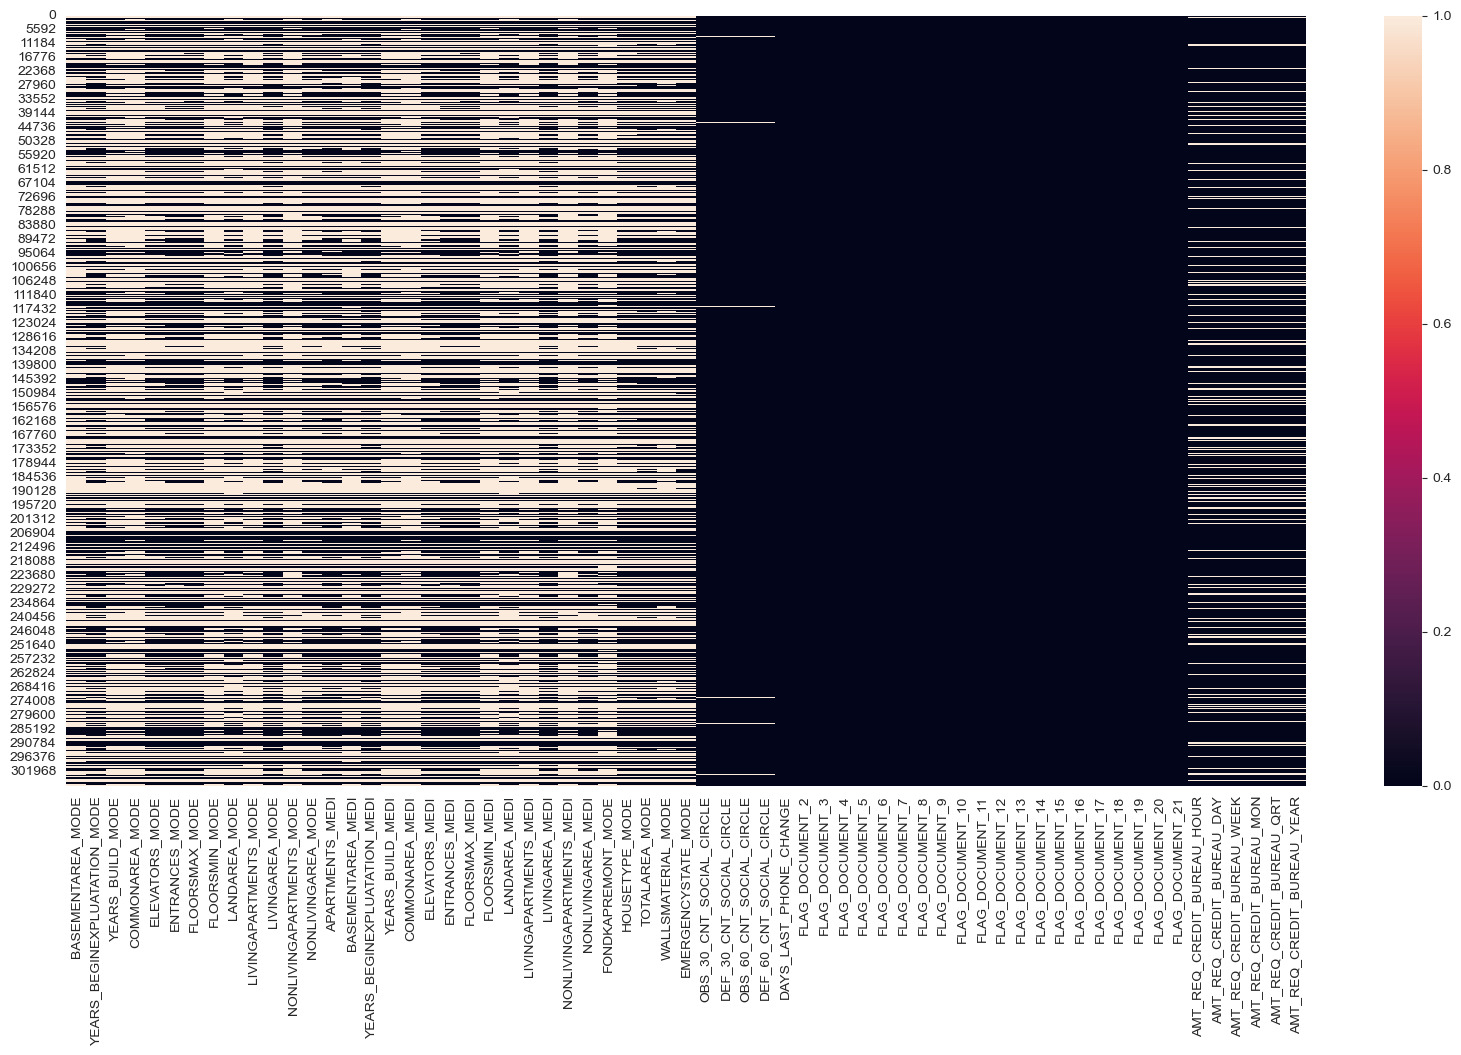

In [185]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_application.loc[:, 'BASEMENTAREA_MODE':].isnull())
plt.show()

### Target
Our target will be the `TARGET` variable that stands for:

- **1** : client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- **0** : all other cases)

In [186]:
df_application['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

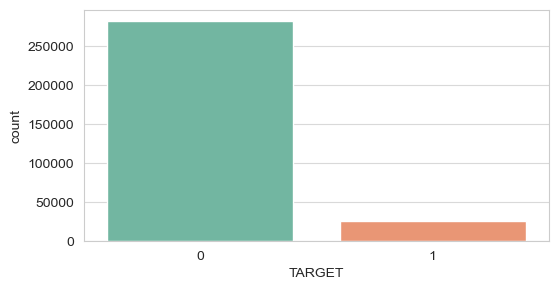

In [187]:
plt.figure(figsize=(6,3))
sns.countplot(df_application, x='TARGET')
plt.show()

We can observe an imbalanced distributin of the target variable, we will have to handle it in the modelling part.

In [273]:
# convert target to string for vizualization only purpose
df_application['TARGET'] = df_application['TARGET'].astype(str)

## Personal information
The dataset contains some personal details as gender, age, family members, etc, let's have a look at common patterns.

### Gender

In [189]:
df_application['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

We see a `XNA` values thats stands for a null value, as explained by the competitiion hosts: 
*"Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values.""*

In [190]:
df_application = df_application.loc[df_application['CODE_GENDER'] != 'XNA', :]

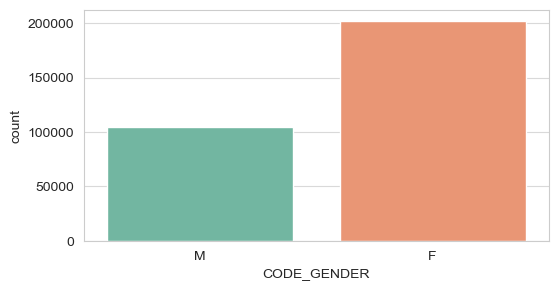

In [191]:
plt.figure(figsize=(6,3))
sns.countplot(df_application, x='CODE_GENDER')

plt.show()

We get almost 2 times more female applicants, let's check how the gender relates to target:

In [192]:
df_application.groupby(['CODE_GENDER','TARGET'])['SK_ID_CURR'].nunique()

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
Name: SK_ID_CURR, dtype: int64

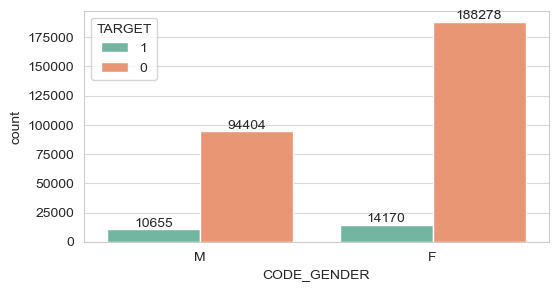

In [193]:
plt.figure(figsize=(6,3))
ax = sns.countplot(df_application, x='CODE_GENDER', hue="TARGET")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

The number of female applications with the target 1 (having difficulties) is slightly higher than for male clients, however, if considered proportionnaly to the total number of clients of boths genders, we get 11% of men and 7.5% for women.

### Age

In [194]:
df_application['AGE'] = round(-1 * df_application['DAYS_BIRTH'] / 365)
df_application[['DAYS_BIRTH', 'AGE']]

,DAYS_BIRTH,AGE
0,-9461,26.0000
1,-16765,46.0000
2,-19046,52.0000
3,-19005,52.0000
4,-19932,55.0000
...,...,...
307506,-9327,26.0000
307507,-20775,57.0000
307508,-14966,41.0000
307509,-11961,33.0000


In [195]:
df_application['AGE'].describe()

count   307507.0000
mean        43.9387
std         11.9640
min         21.0000
25%         34.0000
50%         43.0000
75%         54.0000
max         69.0000
Name: AGE, dtype: float64

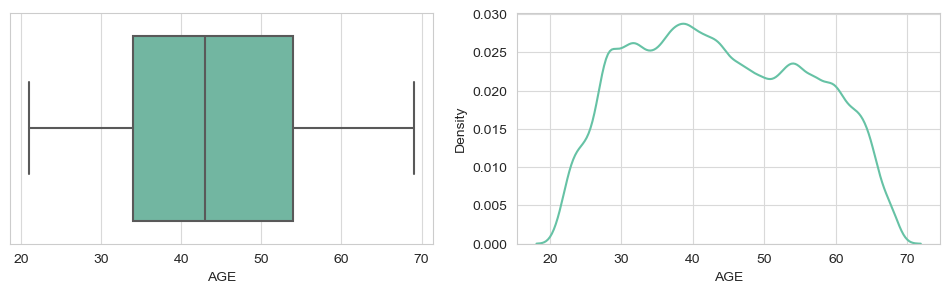

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
sns.boxplot(data = df_application, x = 'AGE', ax = ax1)
sns.kdeplot(x = df_application['AGE'], ax = ax2)
plt.show()

The mean and median age is 43 years old.

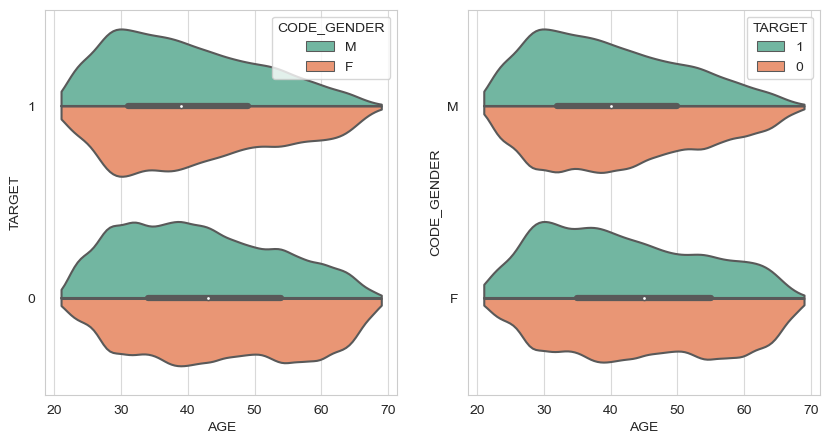

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(
    data=df_application, x="AGE", y="TARGET", hue="CODE_GENDER", cut=0, split=True, ax=ax1
)

sns.violinplot(
    data=df_application, x="AGE", y="CODE_GENDER", hue="TARGET", cut=0, split=True, ax=ax2
)

plt.show()

Interesting insights:
- more women than men after 60 years old with payment difficulties
- more women than men without payment difficulties after 60 years old
- around 30-years old (both F and M) have more payment difficulties than other age ranges
- women in their 30-40 are more likely to have financial issues than in 50-60

### Family

In [198]:
df_application['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

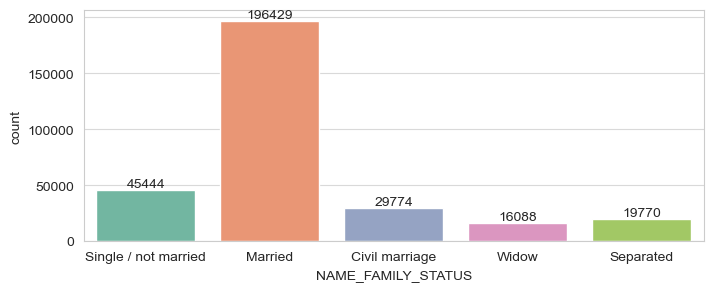

In [199]:
df_application = df_application.loc[df_application['NAME_FAMILY_STATUS'] != 'Unknown', :]

plt.figure(figsize=(8,3))
ax = sns.countplot(df_application, x='NAME_FAMILY_STATUS')
ax.bar_label(ax.containers[0])

plt.show()

([<matplotlib.patches.Wedge at 0x3c51b8f70>,
 [Text(-0.46454872554451915, 0.9970930155180926, 'Married'),
  Text(-0.25561647092968093, -1.0698879473054437, 'Single / not married'),
  Text(0.559816376107119, -0.9468926153700287, 'Civil marriage'),
  Text(0.9486977857311627, -0.5567517501982272, 'Separated'),
  Text(1.085175354972941, -0.17998457978213456, 'Widow')],
 [Text(-0.253390213933374, 0.5438689175553232, '64%'),
  Text(-0.13942716596164414, -0.5835752439847874, '15%'),
  Text(0.3053543869675194, -0.5164868811109247, '10%'),
  Text(0.517471519489725, -0.30368277283539663, '6%'),
  Text(0.5919138299852404, -0.09817340715389157, '5%')])

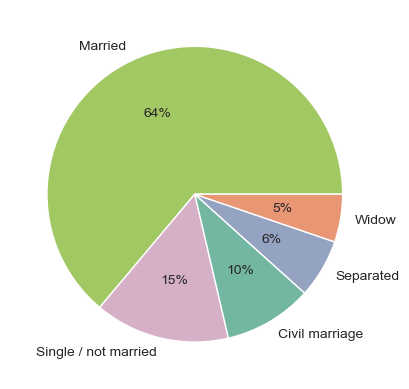

In [200]:
plt.pie(
    df_application['NAME_FAMILY_STATUS'].value_counts().values,
    labels=df_application['NAME_FAMILY_STATUS'].value_counts().index,
    autopct='%.0f%%',
    colors=['#A2C864', '#D5B0C7', '#73B6A1', '#95A3C3', '#E99675'],
    textprops={'size': 10})

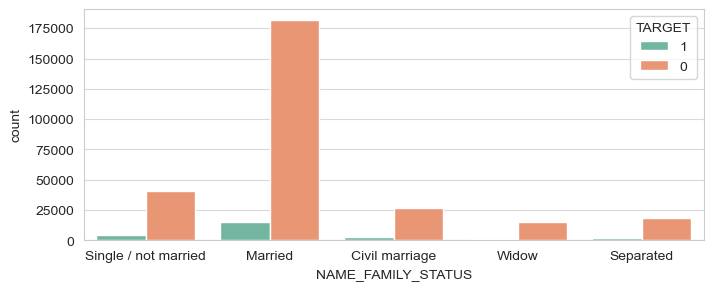

In [201]:
plt.figure(figsize=(8,3))
ax = sns.countplot(df_application, x='NAME_FAMILY_STATUS', hue="TARGET")

plt.show()

Not surprisingly, married persons represent the most part of applicants.

In [202]:
df_application['CNT_CHILDREN'].describe()

count   307505.0000
mean         0.4171
std          0.7221
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

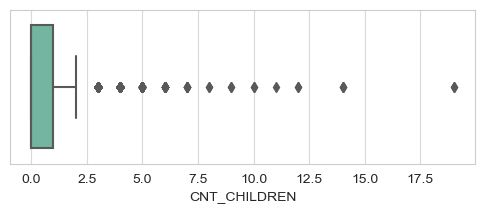

In [203]:
plt.figure(figsize=(6, 2))
sns.boxplot(data = df_application, x = 'CNT_CHILDREN')
plt.show()

75% of clients do not have children.

In [204]:
df_application['cnt_non_child'] = df_application['CNT_FAM_MEMBERS'] - df_application['CNT_CHILDREN']
df_application['child_to_non_child_ratio'] = df_application['CNT_CHILDREN'] / df_application['cnt_non_child']
df_application['income_per_non_child'] = df_application['AMT_INCOME_TOTAL'] / df_application['cnt_non_child']
df_application['credit_per_person'] = df_application['AMT_CREDIT'] / df_application['CNT_FAM_MEMBERS']
df_application['credit_per_child'] = df_application['AMT_CREDIT'] / (1 + df_application['CNT_CHILDREN'])
df_application['credit_per_non_child'] = df_application['AMT_CREDIT'] / df_application['cnt_non_child']

In [205]:
family_features = ['cnt_non_child',
                 'child_to_non_child_ratio',
                 'income_per_non_child',
                 'credit_per_person',
                 'credit_per_child',
                 'credit_per_non_child']

family_corr = abs(df_application[family_features + ['TARGET']].corr())
family_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                     1.0000
credit_per_child           0.0335
credit_per_person          0.0235
child_to_non_child_ratio   0.0209
credit_per_non_child       0.0202
cnt_non_child              0.0122
income_per_non_child       0.0019
Name: TARGET, dtype: float64

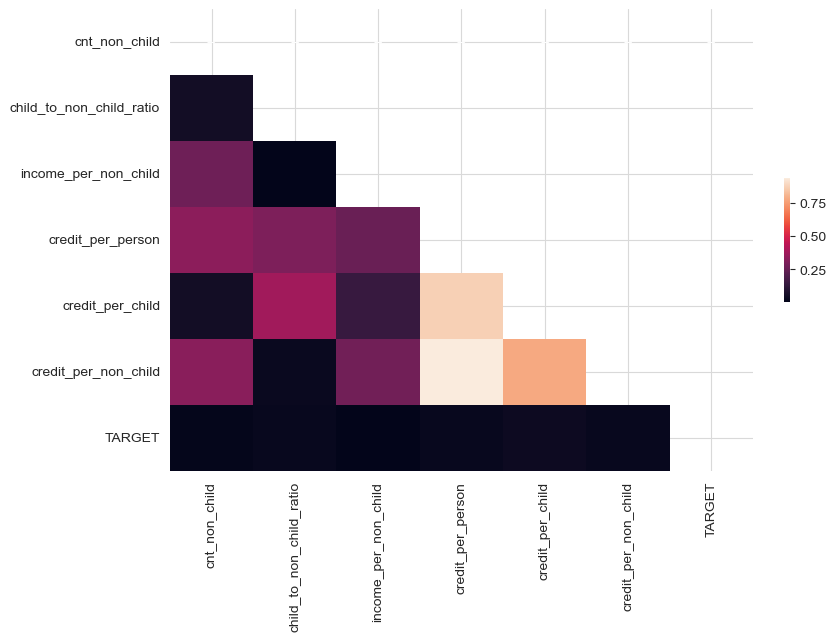

In [206]:
mask = np.zeros_like(family_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
X_eng_corr_heatmap = sns.heatmap(family_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

### Education

In [280]:
df_application['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74861
Incomplete higher                 10276
Lower secondary                    3815
Academic degree                     164
Name: count, dtype: int64

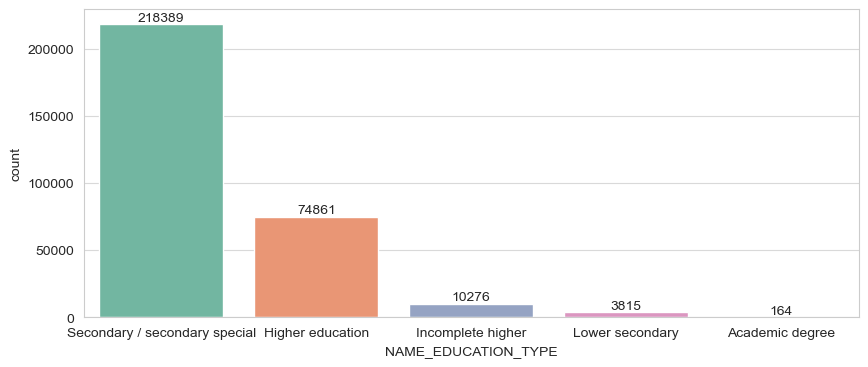

In [289]:
plt.figure(figsize=(10,4))
ax = sns.countplot(df_application, x='NAME_EDUCATION_TYPE')
ax.bar_label(ax.containers[0])

plt.show()

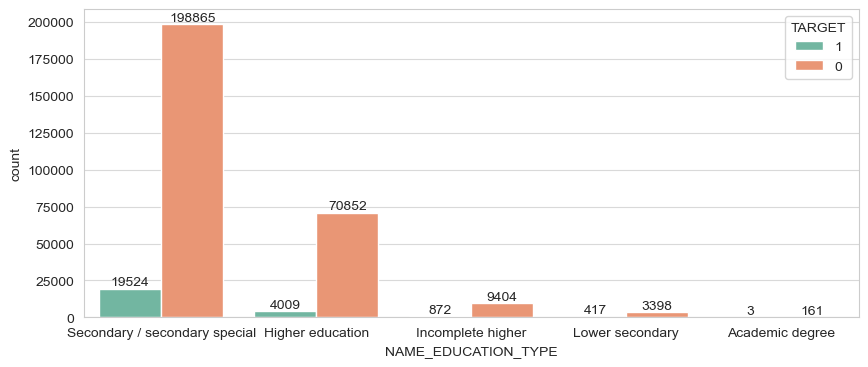

In [290]:
plt.figure(figsize=(10,4))
ax = sns.countplot(df_application, x='NAME_EDUCATION_TYPE', hue='TARGET')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Property

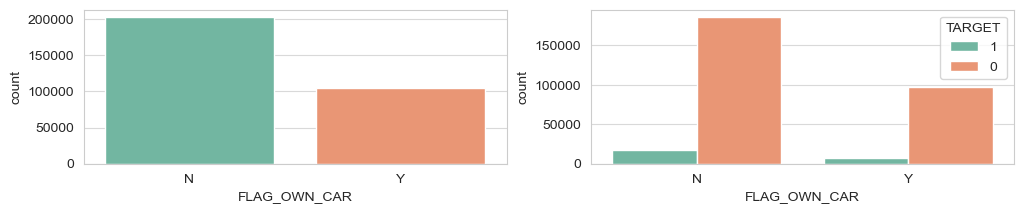

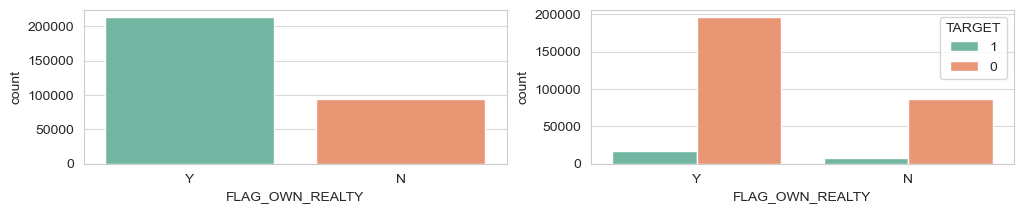

In [207]:
possessions = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for index, feature in enumerate(possessions):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,2))
    sns.countplot(df_application, x=feature, ax=ax1)
    sns.countplot(df_application, x=feature, hue='TARGET', ax=ax2)
    plt.show()

## Income & credit

### Contract type

In [271]:
df_application['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29273
Name: count, dtype: int64

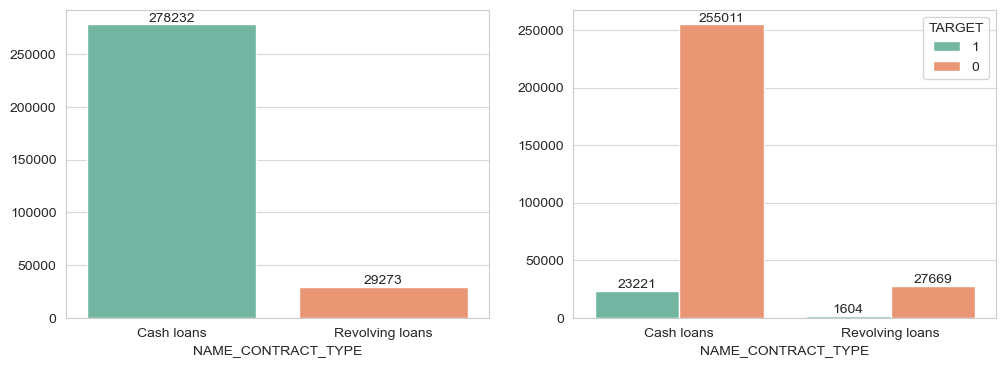

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(df_application, x='NAME_CONTRACT_TYPE', ax=ax1)
ax1.set(ylabel=None)
sns.countplot(df_application, x='NAME_CONTRACT_TYPE', hue='TARGET', ax=ax2)
ax2.set(ylabel=None)

for container in ax1.containers:
    ax1.bar_label(container)

for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

### Num features

___________________
 
AMT_ANNUITY
___________________
 
count   307493.0000
mean     27108.6382
std      14493.8401
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64


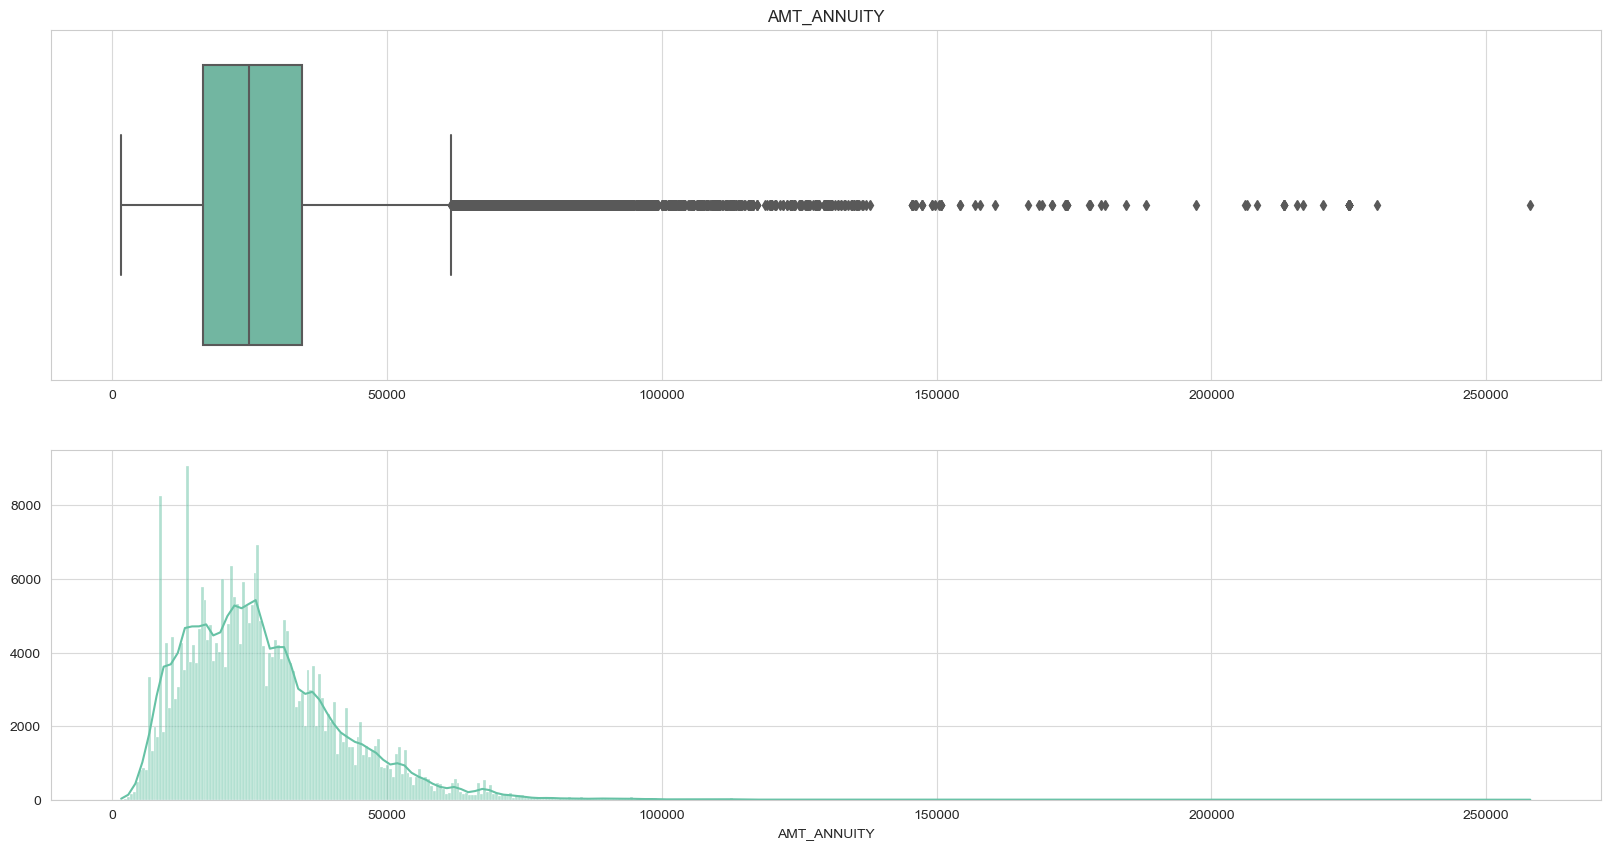

 
___________________
 
AMT_INCOME_TOTAL
___________________
 
count      307505.0000
mean       168796.6617
std        237124.8484
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64


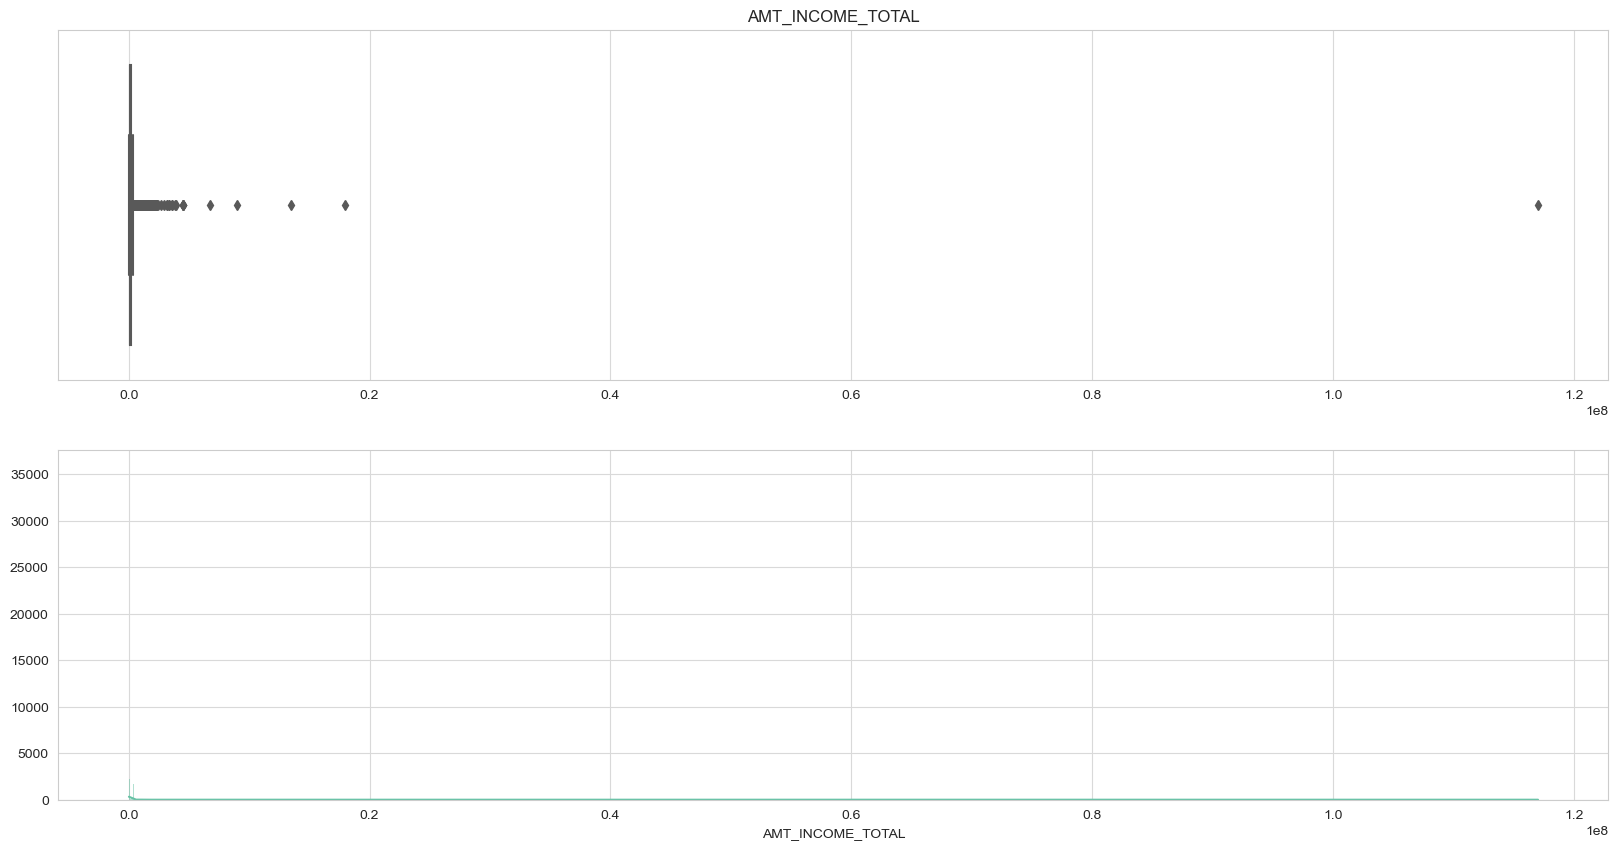

 
___________________
 
AMT_CREDIT
___________________
 
count    307505.0000
mean     599028.3953
std      402493.8866
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64


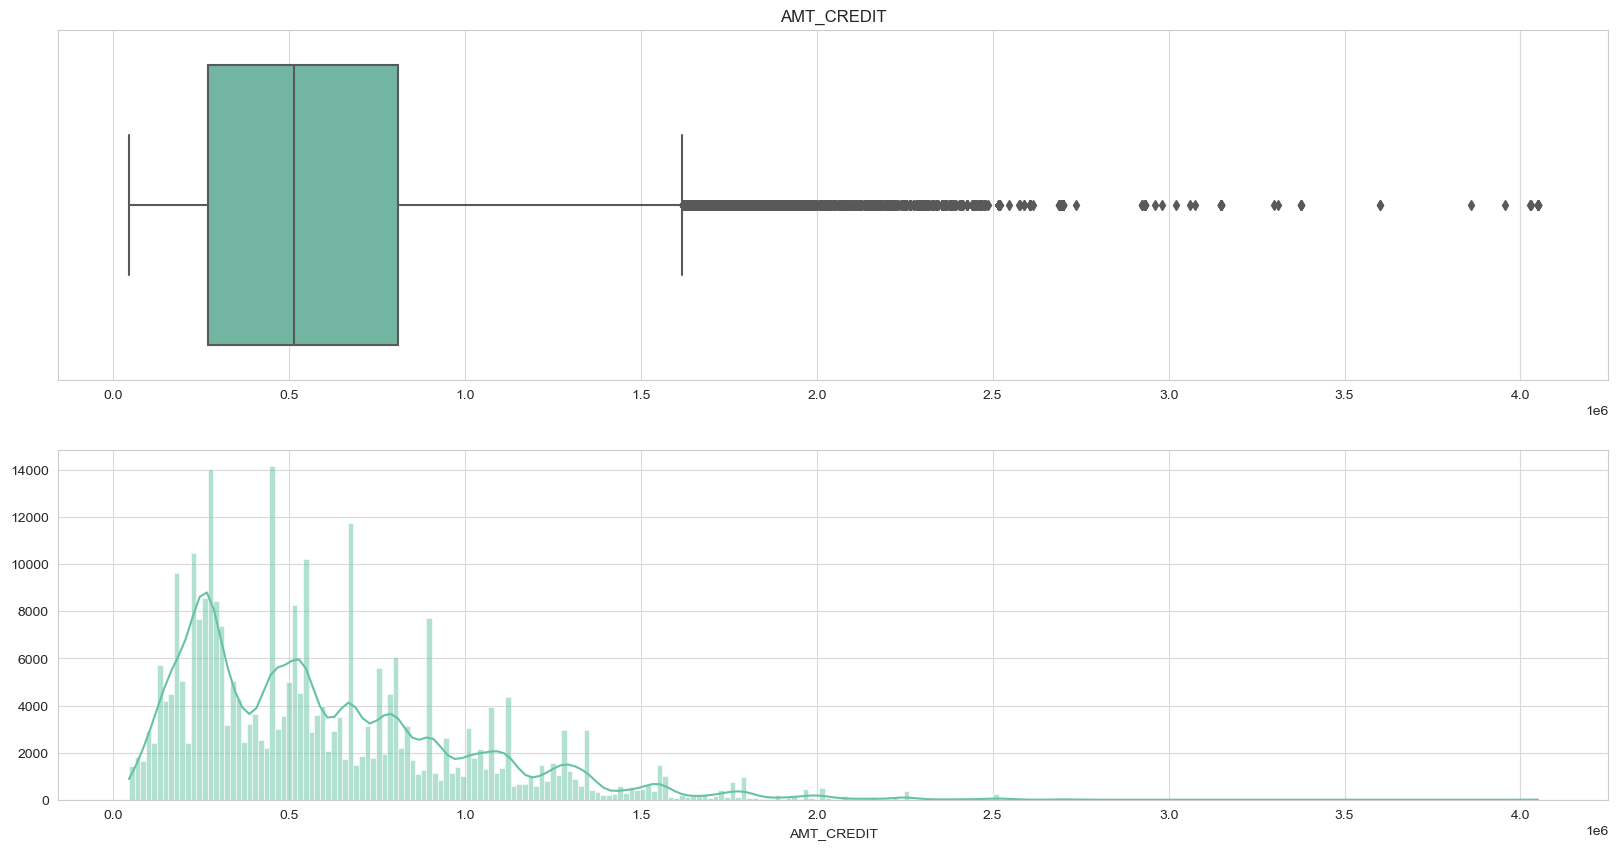

In [208]:
credit_features = [
    'AMT_ANNUITY', # Loan annuity
    'AMT_INCOME_TOTAL', # Income of the client
    'AMT_CREDIT', # Credit amount of the loan
]

for feature in credit_features:
    print('___________________')
    print(' ')
    print(feature)
    print('___________________')
    print(' ')
    
    print(df_application[feature].describe())
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    sns.boxplot(x=df_application[feature], ax=ax1)
    ax1.set(xlabel=None)
    ax1.set_title(feature)
    
    sns.histplot(x=df_application[feature], kde=True, ax=ax2)
    ax2.set(ylabel=None)
    
    plt.show()
    
    print(' ')

In [210]:
credit_corr = abs(df_application[credit_features + ['TARGET']].corr())
credit_corr

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,TARGET
AMT_ANNUITY,1.0000,0.1917,0.7701,0.0128
AMT_INCOME_TOTAL,0.1917,1.0000,0.1569,0.0040
AMT_CREDIT,0.7701,0.1569,1.0000,0.0304
TARGET,0.0128,0.0040,0.0304,1.0000


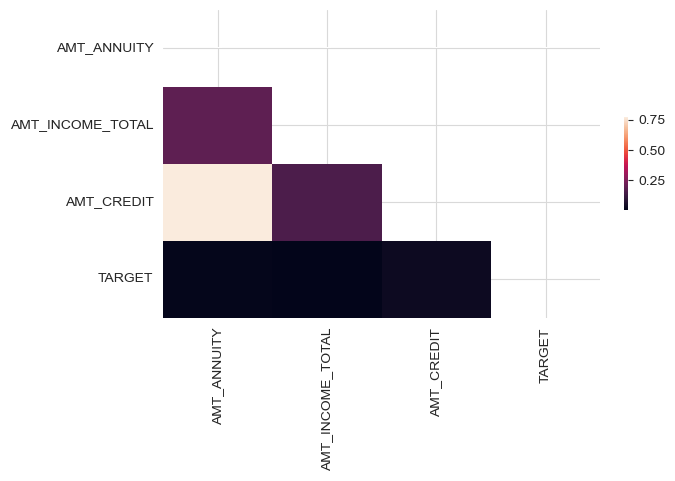

In [211]:
mask = np.zeros_like(credit_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 4))
X_eng_corr_heatmap = sns.heatmap(credit_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

### Engineered features

In [212]:
df_application['annuity_income_percentage'] = df_application['AMT_ANNUITY'] / df_application['AMT_INCOME_TOTAL']
df_application['car_to_birth_ratio'] = df_application['OWN_CAR_AGE'] / df_application['DAYS_BIRTH']
df_application['car_to_employ_ratio'] = df_application['OWN_CAR_AGE'] / df_application['DAYS_EMPLOYED']
df_application['children_ratio'] = df_application['CNT_CHILDREN'] / df_application['CNT_FAM_MEMBERS']
df_application['credit_to_annuity_ratio'] = df_application['AMT_CREDIT'] / df_application['AMT_ANNUITY']
df_application['credit_to_goods_ratio'] = df_application['AMT_CREDIT'] / df_application['AMT_GOODS_PRICE']
df_application['credit_to_income_ratio'] = df_application['AMT_CREDIT'] / df_application['AMT_INCOME_TOTAL']
df_application['days_employed_percentage'] = df_application['DAYS_EMPLOYED'] / df_application['DAYS_BIRTH']
df_application['income_credit_percentage'] = df_application['AMT_INCOME_TOTAL'] / df_application['AMT_CREDIT']
df_application['income_per_child'] = df_application['AMT_INCOME_TOTAL'] / (1 + df_application['CNT_CHILDREN'])
df_application['income_per_person'] = df_application['AMT_INCOME_TOTAL'] / df_application['CNT_FAM_MEMBERS']
df_application['payment_rate'] = df_application['AMT_ANNUITY'] / df_application['AMT_CREDIT']
df_application['phone_to_birth_ratio'] = df_application['DAYS_LAST_PHONE_CHANGE'] / df_application['DAYS_BIRTH']
df_application['phone_to_employ_ratio'] = df_application['DAYS_LAST_PHONE_CHANGE'] / df_application['DAYS_EMPLOYED']

In [213]:
# External sources
df_application['external_sources_weighted'] = df_application.EXT_SOURCE_1 * 2 + df_application.EXT_SOURCE_2 * 3 + df_application.EXT_SOURCE_3 * 4
for function_name in ['min', 'max', 'sum', 'mean', 'nanmedian']:
    df_application['external_sources_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
        df_application[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)

/var/folders/vr/99kbccc17nq3k76_w_1rrznr0000gn/T/ipykernel_1619/2456689693.py:4: RuntimeWarning: All-NaN slice encountered
  df_application['external_sources_{}'.format(function_name)] = eval('np.{}'.format(function_name))(


In [214]:
engineered_credit_features = ['annuity_income_percentage',
                                'car_to_birth_ratio',
                                'car_to_employ_ratio',
                                'children_ratio',
                                'credit_to_annuity_ratio',
                                'credit_to_goods_ratio',
                                'credit_to_income_ratio',
                                'days_employed_percentage',
                                'income_credit_percentage',
                                'income_per_child',
                                'income_per_person',
                                'payment_rate',
                                'phone_to_birth_ratio',
                                'phone_to_employ_ratio',
                                'external_sources_weighted',
                                'external_sources_min',
                                'external_sources_max',
                                'external_sources_sum',
                                'external_sources_mean',
                                'external_sources_nanmedian']

In [215]:
X_eng = df_application[engineered_credit_features + ['TARGET']]
X_eng_corr = abs(X_eng.corr())

In [216]:
X_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                       1.0000
external_sources_weighted    0.2363
external_sources_mean        0.2221
external_sources_nanmedian   0.2181
external_sources_max         0.1969
external_sources_min         0.1853
external_sources_sum         0.1733
credit_to_goods_ratio        0.0694
car_to_birth_ratio           0.0488
days_employed_percentage     0.0422
phone_to_birth_ratio         0.0340
credit_to_annuity_ratio      0.0321
car_to_employ_ratio          0.0306
children_ratio               0.0212
annuity_income_percentage    0.0143
payment_rate                 0.0127
income_per_child             0.0125
credit_to_income_ratio       0.0077
income_per_person            0.0066
phone_to_employ_ratio        0.0046
income_credit_percentage     0.0018
Name: TARGET, dtype: float64

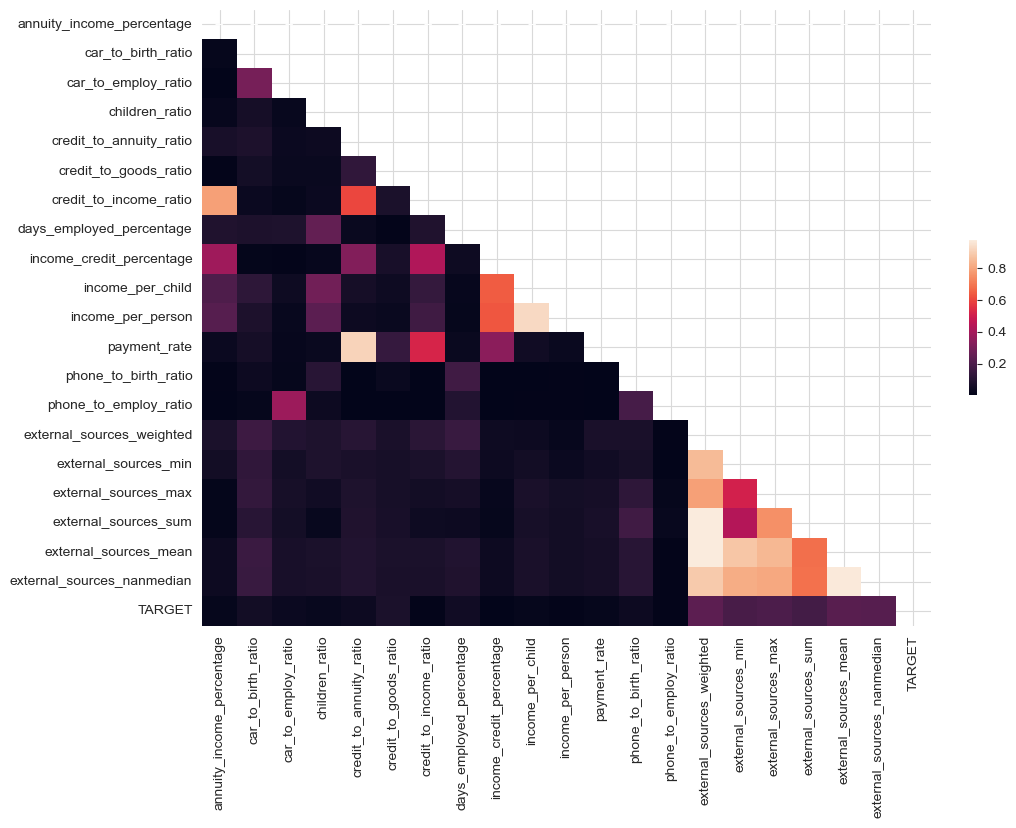

In [217]:
mask = np.zeros_like(X_eng_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
X_eng_corr_heatmap = sns.heatmap(X_eng_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

## Employment

In [218]:
df_application['DAYS_EMPLOYED'].describe()

count   307505.0000
mean     63816.3488
std     141276.8361
min     -17912.0000
25%      -2760.0000
50%      -1213.0000
75%       -289.0000
max     365243.0000
Name: DAYS_EMPLOYED, dtype: float64

In [219]:
df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED'].replace(365243,np.nan)
df_application['DAYS_EMPLOYED'].describe()

count   252131.0000
mean     -2384.1556
std       2338.3317
min     -17912.0000
25%      -3175.0000
50%      -1648.0000
75%       -767.0000
max          0.0000
Name: DAYS_EMPLOYED, dtype: float64

In [220]:
df_application_clean = df_application.loc[df_application['DAYS_EMPLOYED'].notnull(), :]
df_application_clean.shape

(252131, 149)

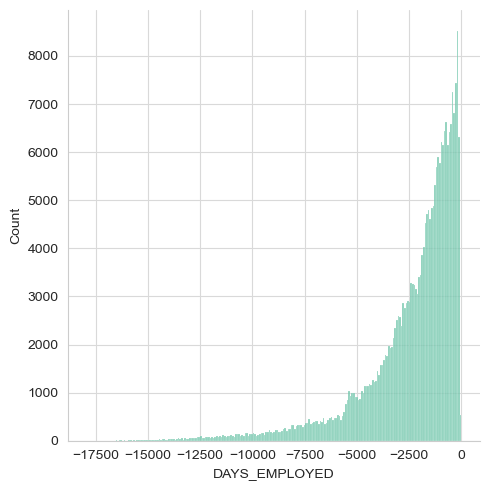

In [221]:
sns.displot(df_application['DAYS_EMPLOYED'])

In [222]:
df_application_clean['long_employment'] = (df_application_clean['DAYS_EMPLOYED'] < -2000).astype(int)

emp_features = df_application_clean[['long_employment', 'DAYS_EMPLOYED', 'TARGET']]
emp_corr = abs(emp_features.corr())
emp_corr.sort_values('TARGET', ascending=False)['TARGET']

/var/folders/vr/99kbccc17nq3k76_w_1rrznr0000gn/T/ipykernel_1619/240541319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_application_clean['long_employment'] = (df_application_clean['DAYS_EMPLOYED'] < -2000).astype(int)


TARGET            1.0000
DAYS_EMPLOYED     0.0750
long_employment   0.0740
Name: TARGET, dtype: float64

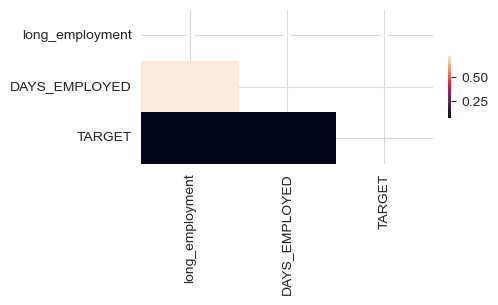

In [223]:
mask = np.zeros_like(emp_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(4, 2))
X_eng_corr_heatmap = sns.heatmap(emp_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

# Previous application

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

In [224]:
df_prev_app = pd.read_csv('./data/source/previous_application.csv')
df_prev_app.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,...,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,NaN,607500.0000,THURSDAY,11,...,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,NaN,112500.0000,TUESDAY,11,...,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,NaN,450000.0000,MONDAY,7,...,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,NaN,337500.0000,THURSDAY,9,...,XNA,24.0000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.9300,315000.0000,340573.5000,NaN,315000.0000,SATURDAY,8,...,XNA,18.0000,low_normal,Cash X-Sell: low,365243.0000,-654.0000,-144.0000,-144.0000,-137.0000,1.0000
6,2315218,175704,Cash loans,NaN,0.0000,0.0000,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0000,0.0000,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0000,0.0000,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0000,0.0000,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
df_prev_app.shape

(1670214, 37)

In [226]:
df_prev_app.info(show_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Number of prev applications

In [237]:
nb_prev_app = df_prev_app.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
nb_prev_app.shape

(338857, 2)

In [238]:
nb_prev_app.head(10)

,SK_ID_CURR,SK_ID_PREV
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
5,100006,9
6,100007,6
7,100008,5
8,100009,7
9,100010,1


In [239]:
nb_prev_app = nb_prev_app.rename(columns={'SK_ID_PREV': 'nb_prev_app'})
nb_prev_app.head(5)

,SK_ID_CURR,nb_prev_app
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [240]:
df_application = df_application.merge(nb_prev_app, on=['SK_ID_CURR'], how='left')
df_application.shape

(307505, 195)

In [241]:
df_application['nb_prev_app'].describe()

count   291053.0000
mean         4.8570
std          4.1468
min          1.0000
25%          2.0000
50%          4.0000
75%          6.0000
max         73.0000
Name: nb_prev_app, dtype: float64

<Axes: xlabel='nb_prev_app', ylabel='Density'>

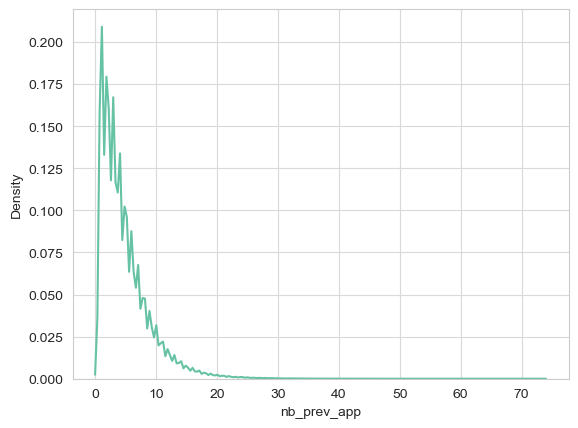

In [246]:
sns.kdeplot(x=df_application['nb_prev_app'])

In [247]:
df_application[['nb_prev_app', 'TARGET']].corr()

,nb_prev_app,TARGET
nb_prev_app,1.0000,0.0198
TARGET,0.0198,1.0000


## Aggregated features

Build an array of tuples (feature_name, agg_type) for the following features:
- `AMT_ANNUITY`: Annuity of previous application
- `AMT_APPLICATION`: For how much credit did client ask on the previous application
- `AMT_CREDIT`: Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
- `AMT_DOWN_PAYMENT`: Down payment on the previous application
- `AMT_GOODS_PRICE`: Goods price of good that client asked for (if applicable) on the previous application
- `CNT_PAYMENT`: Term of previous credit at application of the previous application
- `DAYS_DECISION`: Relative to current application when was the decision about previous application made
- `RATE_DOWN_PAYMENT`: Down payment rate normalized on previous credit
                   

In [227]:
agg_recipies = []

features_to_agg = ['AMT_ANNUITY', # Annuity of previous application
                   'AMT_APPLICATION', # For how much credit did client ask on the previous application
                   'AMT_CREDIT', # Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
                   'AMT_DOWN_PAYMENT',
                   'AMT_GOODS_PRICE',
                   'CNT_PAYMENT',
                   'DAYS_DECISION',
                   'RATE_DOWN_PAYMENT'
                   ]

for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for feature in features_to_agg:
        agg_recipies.append((feature, agg))

agg_recipies

[('AMT_ANNUITY', 'mean'),
 ('AMT_APPLICATION', 'mean'),
 ('AMT_CREDIT', 'mean'),
 ('AMT_DOWN_PAYMENT', 'mean'),
 ('AMT_GOODS_PRICE', 'mean'),
 ('CNT_PAYMENT', 'mean'),
 ('DAYS_DECISION', 'mean'),
 ('HOUR_APPR_PROCESS_START', 'mean'),
 ('RATE_DOWN_PAYMENT', 'mean'),
 ('AMT_ANNUITY', 'min'),
 ('AMT_APPLICATION', 'min'),
 ('AMT_CREDIT', 'min'),
 ('AMT_DOWN_PAYMENT', 'min'),
 ('AMT_GOODS_PRICE', 'min'),
 ('CNT_PAYMENT', 'min'),
 ('DAYS_DECISION', 'min'),
 ('HOUR_APPR_PROCESS_START', 'min'),
 ('RATE_DOWN_PAYMENT', 'min'),
 ('AMT_ANNUITY', 'max'),
 ('AMT_APPLICATION', 'max'),
 ('AMT_CREDIT', 'max'),
 ('AMT_DOWN_PAYMENT', 'max'),
 ('AMT_GOODS_PRICE', 'max'),
 ('CNT_PAYMENT', 'max'),
 ('DAYS_DECISION', 'max'),
 ('HOUR_APPR_PROCESS_START', 'max'),
 ('RATE_DOWN_PAYMENT', 'max'),
 ('AMT_ANNUITY', 'sum'),
 ('AMT_APPLICATION', 'sum'),
 ('AMT_CREDIT', 'sum'),
 ('AMT_DOWN_PAYMENT', 'sum'),
 ('AMT_GOODS_PRICE', 'sum'),
 ('CNT_PAYMENT', 'sum'),
 ('DAYS_DECISION', 'sum'),
 ('HOUR_APPR_PROCESS_START', 's

Add the `SK_ID_CURR` to group by current id

In [228]:
agg_recipies = [(['SK_ID_CURR'], agg_recipies)]
agg_recipies

[(['SK_ID_CURR'],
  [('AMT_ANNUITY', 'mean'),
   ('AMT_APPLICATION', 'mean'),
   ('AMT_CREDIT', 'mean'),
   ('AMT_DOWN_PAYMENT', 'mean'),
   ('AMT_GOODS_PRICE', 'mean'),
   ('CNT_PAYMENT', 'mean'),
   ('DAYS_DECISION', 'mean'),
   ('HOUR_APPR_PROCESS_START', 'mean'),
   ('RATE_DOWN_PAYMENT', 'mean'),
   ('AMT_ANNUITY', 'min'),
   ('AMT_APPLICATION', 'min'),
   ('AMT_CREDIT', 'min'),
   ('AMT_DOWN_PAYMENT', 'min'),
   ('AMT_GOODS_PRICE', 'min'),
   ('CNT_PAYMENT', 'min'),
   ('DAYS_DECISION', 'min'),
   ('HOUR_APPR_PROCESS_START', 'min'),
   ('RATE_DOWN_PAYMENT', 'min'),
   ('AMT_ANNUITY', 'max'),
   ('AMT_APPLICATION', 'max'),
   ('AMT_CREDIT', 'max'),
   ('AMT_DOWN_PAYMENT', 'max'),
   ('AMT_GOODS_PRICE', 'max'),
   ('CNT_PAYMENT', 'max'),
   ('DAYS_DECISION', 'max'),
   ('HOUR_APPR_PROCESS_START', 'max'),
   ('RATE_DOWN_PAYMENT', 'max'),
   ('AMT_ANNUITY', 'sum'),
   ('AMT_APPLICATION', 'sum'),
   ('AMT_CREDIT', 'sum'),
   ('AMT_DOWN_PAYMENT', 'sum'),
   ('AMT_GOODS_PRICE', 'sum'),
 

In [229]:
groupby_agg_names = []

for groupby_col, recipies in tqdm.tqdm(agg_recipies):
    group_object = df_prev_app.groupby(groupby_col)
    
    for feature, agg_func in tqdm.tqdm(recipies):
        groupby_agg_name = '{}_{}_{}'.format('PREV_APP', agg_func, feature)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_agg_name})
                              [groupby_col + [groupby_agg_name]],
                              on=groupby_col,
                              how='left')
        groupby_agg_names.append(groupby_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [230]:
groupby_agg_names

['SK_ID_CURR_mean_AMT_ANNUITY',
 'SK_ID_CURR_mean_AMT_APPLICATION',
 'SK_ID_CURR_mean_AMT_CREDIT',
 'SK_ID_CURR_mean_AMT_DOWN_PAYMENT',
 'SK_ID_CURR_mean_AMT_GOODS_PRICE',
 'SK_ID_CURR_mean_CNT_PAYMENT',
 'SK_ID_CURR_mean_DAYS_DECISION',
 'SK_ID_CURR_mean_HOUR_APPR_PROCESS_START',
 'SK_ID_CURR_mean_RATE_DOWN_PAYMENT',
 'SK_ID_CURR_min_AMT_ANNUITY',
 'SK_ID_CURR_min_AMT_APPLICATION',
 'SK_ID_CURR_min_AMT_CREDIT',
 'SK_ID_CURR_min_AMT_DOWN_PAYMENT',
 'SK_ID_CURR_min_AMT_GOODS_PRICE',
 'SK_ID_CURR_min_CNT_PAYMENT',
 'SK_ID_CURR_min_DAYS_DECISION',
 'SK_ID_CURR_min_HOUR_APPR_PROCESS_START',
 'SK_ID_CURR_min_RATE_DOWN_PAYMENT',
 'SK_ID_CURR_max_AMT_ANNUITY',
 'SK_ID_CURR_max_AMT_APPLICATION',
 'SK_ID_CURR_max_AMT_CREDIT',
 'SK_ID_CURR_max_AMT_DOWN_PAYMENT',
 'SK_ID_CURR_max_AMT_GOODS_PRICE',
 'SK_ID_CURR_max_CNT_PAYMENT',
 'SK_ID_CURR_max_DAYS_DECISION',
 'SK_ID_CURR_max_HOUR_APPR_PROCESS_START',
 'SK_ID_CURR_max_RATE_DOWN_PAYMENT',
 'SK_ID_CURR_sum_AMT_ANNUITY',
 'SK_ID_CURR_sum_AMT_APPLIC

In [231]:
df_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 194 columns):
 #    Column                                   Non-Null Count   Dtype  
---   ------                                   --------------   -----  
 0    SK_ID_CURR                               307505 non-null  int64  
 1    TARGET                                   307505 non-null  object 
 2    NAME_CONTRACT_TYPE                       307505 non-null  object 
 3    CODE_GENDER                              307505 non-null  object 
 4    FLAG_OWN_CAR                             307505 non-null  object 
 5    FLAG_OWN_REALTY                          307505 non-null  object 
 6    CNT_CHILDREN                             307505 non-null  int64  
 7    AMT_INCOME_TOTAL                         307505 non-null  float64
 8    AMT_CREDIT                               307505 non-null  float64
 9    AMT_ANNUITY                              307493 non-null  float64
 10   AMT_GOODS_PRICE   

In [232]:
app_agg_corr = abs(df_application[groupby_agg_names + ['TARGET']].corr())
app_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                    1.0000
SK_ID_CURR_min_DAYS_DECISION              0.0534
SK_ID_CURR_var_DAYS_DECISION              0.0485
SK_ID_CURR_mean_DAYS_DECISION             0.0469
SK_ID_CURR_var_CNT_PAYMENT                0.0420
SK_ID_CURR_sum_RATE_DOWN_PAYMENT          0.0417
SK_ID_CURR_max_RATE_DOWN_PAYMENT          0.0401
SK_ID_CURR_mean_HOUR_APPR_PROCESS_START   0.0359
SK_ID_CURR_mean_AMT_ANNUITY               0.0349
SK_ID_CURR_mean_RATE_DOWN_PAYMENT         0.0336
SK_ID_CURR_min_AMT_ANNUITY                0.0323
SK_ID_CURR_min_HOUR_APPR_PROCESS_START    0.0314
SK_ID_CURR_max_HOUR_APPR_PROCESS_START    0.0308
SK_ID_CURR_max_CNT_PAYMENT                0.0294
SK_ID_CURR_max_AMT_ANNUITY                0.0290
SK_ID_CURR_mean_CNT_PAYMENT               0.0277
SK_ID_CURR_sum_CNT_PAYMENT                0.0277
SK_ID_CURR_sum_AMT_DOWN_PAYMENT           0.0270
SK_ID_CURR_max_AMT_DOWN_PAYMENT           0.0253
SK_ID_CURR_mean_AMT_DOWN_PAYMENT          0.0246
SK_ID_CURR_var_RATE_

# Bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [248]:
df_bureau = pd.read_csv('./data/source/bureau.csv')
df_bureau.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0000,-153.0000,NaN,0,91323.0000,0.0000,NaN,0.0000,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0000,NaN,NaN,0,225000.0000,171342.0000,NaN,0.0000,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0000,NaN,NaN,0,464323.5000,NaN,NaN,0.0000,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0000,NaN,NaN,0.0000,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0000,NaN,77674.5000,0,2700000.0000,NaN,NaN,0.0000,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0000,NaN,0.0000,0,180000.0000,71017.3800,108982.6200,0.0000,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0000,NaN,0.0000,0,42103.8000,42103.8000,0.0000,0.0000,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0000,-1710.0000,14985.0000,0,76878.4500,0.0000,0.0000,0.0000,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0000,-840.0000,0.0000,0,103007.7000,0.0000,0.0000,0.0000,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0000,NaN,0.0000,0,4500.0000,0.0000,0.0000,0.0000,Credit card,-690,NaN


In [249]:
df_bureau.shape

(1716428, 17)

In [251]:
df_bureau.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

## Number of prev credits

In [253]:
nb_prev_credits = df_bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().reset_index()
nb_prev_credits = nb_prev_credits.rename(columns={'SK_ID_BUREAU': 'nb_prev_credits'})
print(nb_prev_credits.shape)
nb_prev_credits.head(5)

(305811, 2)


,SK_ID_CURR,nb_prev_credits
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [254]:
df_application = df_application.merge(nb_prev_credits, on=['SK_ID_CURR'], how='left')
df_application.shape

(307505, 196)

In [256]:
df_application['nb_prev_credits'].describe()

count   263486.0000
mean         5.5612
std          4.3779
min          1.0000
25%          2.0000
50%          4.0000
75%          8.0000
max        116.0000
Name: nb_prev_credits, dtype: float64

<Axes: xlabel='nb_prev_credits', ylabel='Density'>

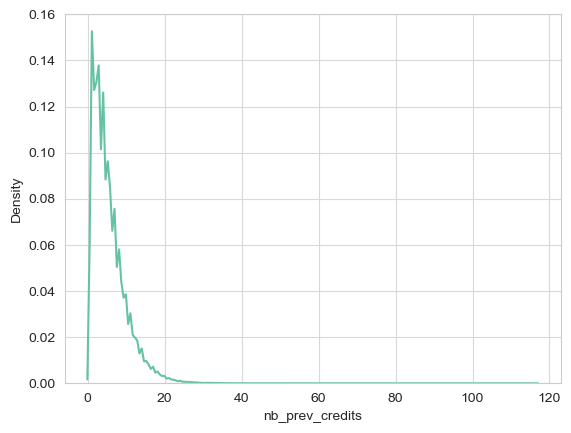

In [257]:
sns.kdeplot(x=df_application['nb_prev_credits'])

In [258]:
df_application[['nb_prev_credits', 'TARGET']].corr()

,nb_prev_credits,TARGET
nb_prev_credits,1.0000,0.0041
TARGET,0.0041,1.0000


## Aggregated features

Build a config array for each feature and an aggregation function, then merge into application dataset.
- `AMT_ANNUITY`: Annuity of the Credit Bureau credit
- `AMT_CREDIT_SUM`: Current credit amount for the Credit Bureau credit
- `AMT_CREDIT_SUM_DEBT`: Current debt on Credit Bureau credit
- `AMT_CREDIT_SUM_LIMIT`: Current credit limit of credit card reported in Credit Bureau
- `AMT_CREDIT_SUM_OVERDUE`: Current amount overdue on Credit Bureau credit
- `AMT_CREDIT_MAX_OVERDUE`: Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
- `CNT_CREDIT_PROLONG`: How many times was the Credit Bureau credit prolonged
- `CREDIT_DAY_OVERDUE`: Number of days past due on CB credit at the time of application for related loan in our sample
- `DAYS_CREDIT`: How many days before current application did client apply for Credit Bureau credit
- `DAYS_CREDIT_ENDDATE`: Remaining duration of CB credit (in days) at the time of application in Home Credit
- `DAYS_CREDIT_UPDATE`: How many days before loan application did last information about the Credit Bureau credit come


In [261]:
bureau_agg_recipies = [
    ('CREDIT_TYPE', 'count'), 
    ('CREDIT_ACTIVE', 'size')
]

bureau_feat_to_agg = ['AMT_ANNUITY',
                   'AMT_CREDIT_SUM',
                   'AMT_CREDIT_SUM_DEBT',
                   'AMT_CREDIT_SUM_LIMIT',
                   'AMT_CREDIT_SUM_OVERDUE',
                   'AMT_CREDIT_MAX_OVERDUE',
                   'CNT_CREDIT_PROLONG',
                   'CREDIT_DAY_OVERDUE',
                   'DAYS_CREDIT',
                   'DAYS_CREDIT_ENDDATE',
                   'DAYS_CREDIT_UPDATE'
                   ]

for agg_func in ['mean', 'min', 'max', 'sum', 'var']:
    for feature in bureau_feat_to_agg:
        bureau_agg_recipies.append((feature, agg_func))
        
bureau_agg_recipies = [(['SK_ID_CURR'], bureau_agg_recipies)]
bureau_agg_recipies

[(['SK_ID_CURR'],
  [('CREDIT_TYPE', 'count'),
   ('CREDIT_ACTIVE', 'size'),
   ('AMT_ANNUITY', 'mean'),
   ('AMT_CREDIT_SUM', 'mean'),
   ('AMT_CREDIT_SUM_DEBT', 'mean'),
   ('AMT_CREDIT_SUM_LIMIT', 'mean'),
   ('AMT_CREDIT_SUM_OVERDUE', 'mean'),
   ('AMT_CREDIT_MAX_OVERDUE', 'mean'),
   ('CNT_CREDIT_PROLONG', 'mean'),
   ('CREDIT_DAY_OVERDUE', 'mean'),
   ('DAYS_CREDIT', 'mean'),
   ('DAYS_CREDIT_ENDDATE', 'mean'),
   ('DAYS_CREDIT_UPDATE', 'mean'),
   ('AMT_ANNUITY', 'min'),
   ('AMT_CREDIT_SUM', 'min'),
   ('AMT_CREDIT_SUM_DEBT', 'min'),
   ('AMT_CREDIT_SUM_LIMIT', 'min'),
   ('AMT_CREDIT_SUM_OVERDUE', 'min'),
   ('AMT_CREDIT_MAX_OVERDUE', 'min'),
   ('CNT_CREDIT_PROLONG', 'min'),
   ('CREDIT_DAY_OVERDUE', 'min'),
   ('DAYS_CREDIT', 'min'),
   ('DAYS_CREDIT_ENDDATE', 'min'),
   ('DAYS_CREDIT_UPDATE', 'min'),
   ('AMT_ANNUITY', 'max'),
   ('AMT_CREDIT_SUM', 'max'),
   ('AMT_CREDIT_SUM_DEBT', 'max'),
   ('AMT_CREDIT_SUM_LIMIT', 'max'),
   ('AMT_CREDIT_SUM_OVERDUE', 'max'),
   ('AMT_C

In [267]:
groupby_bureau_agg_names = []

for groupby_cols, specs in tqdm.tqdm(bureau_agg_recipies):
    group_object = df_bureau.groupby(groupby_cols)
    
    for feature, agg_func in tqdm.tqdm(specs):
        groupby_bureau_agg_name = '{}_{}_{}'.format('BUREAU', agg_func, feature)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_bureau_agg_name})
                              [groupby_cols + [groupby_bureau_agg_name]],
                              on=groupby_cols,
                              how='left')
        groupby_bureau_agg_names.append(groupby_bureau_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

In [268]:
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 310 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    SK_ID_CURR                               int64  
 1    TARGET                                   int64  
 2    NAME_CONTRACT_TYPE                       object 
 3    CODE_GENDER                              object 
 4    FLAG_OWN_CAR                             object 
 5    FLAG_OWN_REALTY                          object 
 6    CNT_CHILDREN                             int64  
 7    AMT_INCOME_TOTAL                         float64
 8    AMT_CREDIT                               float64
 9    AMT_ANNUITY                              float64
 10   AMT_GOODS_PRICE                          float64
 11   NAME_TYPE_SUITE                          object 
 12   NAME_INCOME_TYPE                         object 
 13   NAME_EDUCATION_TYPE                      object 
 14   NA

In [264]:
groupby_bureau_agg_names

['SK_ID_CURR_count_CREDIT_TYPE',
 'SK_ID_CURR_size_CREDIT_ACTIVE',
 'SK_ID_CURR_mean_AMT_ANNUITY',
 'SK_ID_CURR_mean_AMT_CREDIT_SUM',
 'SK_ID_CURR_mean_AMT_CREDIT_SUM_DEBT',
 'SK_ID_CURR_mean_AMT_CREDIT_SUM_LIMIT',
 'SK_ID_CURR_mean_AMT_CREDIT_SUM_OVERDUE',
 'SK_ID_CURR_mean_AMT_CREDIT_MAX_OVERDUE',
 'SK_ID_CURR_mean_CNT_CREDIT_PROLONG',
 'SK_ID_CURR_mean_CREDIT_DAY_OVERDUE',
 'SK_ID_CURR_mean_DAYS_CREDIT',
 'SK_ID_CURR_mean_DAYS_CREDIT_ENDDATE',
 'SK_ID_CURR_mean_DAYS_CREDIT_UPDATE',
 'SK_ID_CURR_min_AMT_ANNUITY',
 'SK_ID_CURR_min_AMT_CREDIT_SUM',
 'SK_ID_CURR_min_AMT_CREDIT_SUM_DEBT',
 'SK_ID_CURR_min_AMT_CREDIT_SUM_LIMIT',
 'SK_ID_CURR_min_AMT_CREDIT_SUM_OVERDUE',
 'SK_ID_CURR_min_AMT_CREDIT_MAX_OVERDUE',
 'SK_ID_CURR_min_CNT_CREDIT_PROLONG',
 'SK_ID_CURR_min_CREDIT_DAY_OVERDUE',
 'SK_ID_CURR_min_DAYS_CREDIT',
 'SK_ID_CURR_min_DAYS_CREDIT_ENDDATE',
 'SK_ID_CURR_min_DAYS_CREDIT_UPDATE',
 'SK_ID_CURR_max_AMT_ANNUITY',
 'SK_ID_CURR_max_AMT_CREDIT_SUM',
 'SK_ID_CURR_max_AMT_CREDIT_SUM_D

In [269]:
bureau_agg_corr = abs(df_application[groupby_bureau_agg_names + ['TARGET']].corr())
bureau_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                               1.0000
BUREAU_mean_DAYS_CREDIT              0.0897
BUREAU_min_DAYS_CREDIT               0.0752
BUREAU_mean_DAYS_CREDIT_UPDATE       0.0689
BUREAU_sum_DAYS_CREDIT_ENDDATE       0.0537
BUREAU_max_DAYS_CREDIT               0.0498
BUREAU_mean_DAYS_CREDIT_ENDDATE      0.0470
BUREAU_min_DAYS_CREDIT_UPDATE        0.0429
BUREAU_sum_DAYS_CREDIT               0.0420
BUREAU_sum_DAYS_CREDIT_UPDATE        0.0414
BUREAU_var_DAYS_CREDIT               0.0384
BUREAU_var_DAYS_CREDIT_ENDDATE       0.0374
BUREAU_max_DAYS_CREDIT_ENDDATE       0.0366
BUREAU_min_DAYS_CREDIT_ENDDATE       0.0343
BUREAU_max_DAYS_CREDIT_UPDATE        0.0282
BUREAU_mean_AMT_CREDIT_SUM           0.0200
BUREAU_max_AMT_CREDIT_SUM            0.0197
BUREAU_sum_AMT_CREDIT_SUM            0.0141
BUREAU_sum_AMT_CREDIT_SUM_OVERDUE    0.0133
BUREAU_mean_AMT_CREDIT_SUM_LIMIT     0.0114
BUREAU_min_AMT_CREDIT_SUM            0.0108
BUREAU_max_AMT_CREDIT_SUM_LIMIT      0.0106
BUREAU_max_AMT_CREDIT_SUM_OVERDU